In [33]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Data Preprocessing
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Models ML
from sklearn.svm import SVC
#Metrics
from sklearn.metrics import confusion_matrix,accuracy_score
# from sklearn.metrics import mean_squared_error,r2_score
# from sklearn.metrics import roc_curve, auc

In [34]:
data = pd.read_csv(r"C:\Users\Asus\Downloads\loan_data.csv")
data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [35]:
row,col = data.shape
print("No of row = ",row)
print("No of col = ",col)

No of row =  45000
No of col =  14


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [37]:
data.dropna()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [38]:
#convert al the adata types into boolean
data['previous_loan_defaults_on_file'] = data['previous_loan_defaults_on_file'].astype('bool')


In [39]:
data.describe()
data

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,True,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,True,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,True,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,True,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,True,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,True,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,True,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,True,1


In [41]:
print(len(data[data['loan_status'] == 0]))
print(len(data[data['loan_status'] == 1]))

35000
10000


In [43]:
df1 = data[data['loan_status'] == 1]
df2 = data[data['loan_status'] == 0].iloc[0:10626]
print(len(df1))
data = pd.concat([df1,df2])
print(len(df2))

10000
10626


In [44]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()

data["person_gender"] = ord_enc.fit_transform(data[["person_gender"]]).astype('int')
data["person_education"] = ord_enc.fit_transform(data[["person_education"]]).astype('int')
data["person_home_ownership"] = ord_enc.fit_transform(data[["person_home_ownership"]]).astype('int')
data["loan_intent"] = ord_enc.fit_transform(data[["loan_intent"]]).astype('int')
data

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0,4,71948.0,0,3,35000.0,4,16.02,0.49,3.0,561,True,1
2,25.0,0,3,12438.0,3,0,5500.0,3,12.87,0.44,3.0,635,True,1
3,23.0,0,1,79753.0,0,3,35000.0,3,15.23,0.44,2.0,675,True,1
4,24.0,1,4,66135.0,1,3,35000.0,3,14.27,0.53,4.0,586,True,1
5,21.0,0,3,12951.0,0,2,2500.0,5,7.14,0.19,2.0,532,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13812,24.0,0,0,39955.0,0,2,4200.0,1,7.29,0.11,2.0,610,True,0
13813,24.0,1,3,116330.0,0,0,2000.0,3,10.38,0.02,3.0,645,True,0
13814,24.0,0,1,95797.0,2,3,13800.0,2,8.49,0.14,2.0,725,True,0
13815,25.0,1,3,97722.0,3,3,13800.0,4,11.99,0.14,3.0,546,True,0


In [45]:
data.corr()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
person_age,1.000000,0.009143,-0.018472,0.066694,0.939409,0.069601,0.141502,-0.025125,0.175925,0.127311,0.821740,0.143703,NaN,0.392729
person_gender,0.009143,1.000000,-0.001395,0.013475,0.007967,0.004078,0.003508,-0.000740,0.004016,0.000416,0.005165,0.001681,NaN,0.001063
person_education,-0.018472,-0.001395,1.000000,0.004244,-0.013633,-0.008825,-0.004840,-0.004980,-0.000727,-0.013632,-0.017226,0.005116,NaN,-0.014590
person_income,0.066694,0.013475,0.004244,1.000000,0.056821,-0.238969,0.380024,-0.022608,0.067726,-0.285259,0.019966,0.016680,NaN,-0.136757
person_emp_exp,0.939409,0.007967,-0.013633,0.056821,1.000000,0.061601,0.125441,-0.022377,0.164114,0.116359,0.778485,0.152202,NaN,0.354501
person_home_ownership,0.069601,0.004078,-0.008825,-0.238969,0.061601,1.000000,-0.052304,0.013697,0.108229,0.178688,0.092633,0.016492,NaN,0.240151
loan_amnt,0.141502,0.003508,-0.004840,0.380024,0.125441,-0.052304,1.000000,-0.006283,0.167795,0.639945,0.132957,0.025057,NaN,0.193637
loan_intent,-0.025125,-0.000740,-0.004980,-0.022608,-0.022377,0.013697,-0.006283,1.000000,-0.018126,0.017859,-0.031813,0.013434,NaN,-0.065299
loan_int_rate,0.175925,0.004016,-0.000727,0.067726,0.164114,0.108229,0.167795,-0.018126,1.000000,0.084076,0.191483,0.037675,NaN,0.384929
loan_percent_income,0.127311,0.000416,-0.013632,-0.285259,0.116359,0.178688,0.639945,0.017859,0.084076,1.000000,0.158452,0.015328,NaN,0.390202


In [46]:
auto=set(data['previous_loan_defaults_on_file'])
auto

{True}

In [47]:
data = data.drop(columns=['previous_loan_defaults_on_file'])

In [48]:
data

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
0,22.0,0,4,71948.0,0,3,35000.0,4,16.02,0.49,3.0,561,1
2,25.0,0,3,12438.0,3,0,5500.0,3,12.87,0.44,3.0,635,1
3,23.0,0,1,79753.0,0,3,35000.0,3,15.23,0.44,2.0,675,1
4,24.0,1,4,66135.0,1,3,35000.0,3,14.27,0.53,4.0,586,1
5,21.0,0,3,12951.0,0,2,2500.0,5,7.14,0.19,2.0,532,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13812,24.0,0,0,39955.0,0,2,4200.0,1,7.29,0.11,2.0,610,0
13813,24.0,1,3,116330.0,0,0,2000.0,3,10.38,0.02,3.0,645,0
13814,24.0,0,1,95797.0,2,3,13800.0,2,8.49,0.14,2.0,725,0
13815,25.0,1,3,97722.0,3,3,13800.0,4,11.99,0.14,3.0,546,0


In [49]:
data.corr()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
person_age,1.000000,0.009143,-0.018472,0.066694,0.939409,0.069601,0.141502,-0.025125,0.175925,0.127311,0.821740,0.143703,0.392729
person_gender,0.009143,1.000000,-0.001395,0.013475,0.007967,0.004078,0.003508,-0.000740,0.004016,0.000416,0.005165,0.001681,0.001063
person_education,-0.018472,-0.001395,1.000000,0.004244,-0.013633,-0.008825,-0.004840,-0.004980,-0.000727,-0.013632,-0.017226,0.005116,-0.014590
person_income,0.066694,0.013475,0.004244,1.000000,0.056821,-0.238969,0.380024,-0.022608,0.067726,-0.285259,0.019966,0.016680,-0.136757
person_emp_exp,0.939409,0.007967,-0.013633,0.056821,1.000000,0.061601,0.125441,-0.022377,0.164114,0.116359,0.778485,0.152202,0.354501
person_home_ownership,0.069601,0.004078,-0.008825,-0.238969,0.061601,1.000000,-0.052304,0.013697,0.108229,0.178688,0.092633,0.016492,0.240151
loan_amnt,0.141502,0.003508,-0.004840,0.380024,0.125441,-0.052304,1.000000,-0.006283,0.167795,0.639945,0.132957,0.025057,0.193637
loan_intent,-0.025125,-0.000740,-0.004980,-0.022608,-0.022377,0.013697,-0.006283,1.000000,-0.018126,0.017859,-0.031813,0.013434,-0.065299
loan_int_rate,0.175925,0.004016,-0.000727,0.067726,0.164114,0.108229,0.167795,-0.018126,1.000000,0.084076,0.191483,0.037675,0.384929
loan_percent_income,0.127311,0.000416,-0.013632,-0.285259,0.116359,0.178688,0.639945,0.017859,0.084076,1.000000,0.158452,0.015328,0.390202


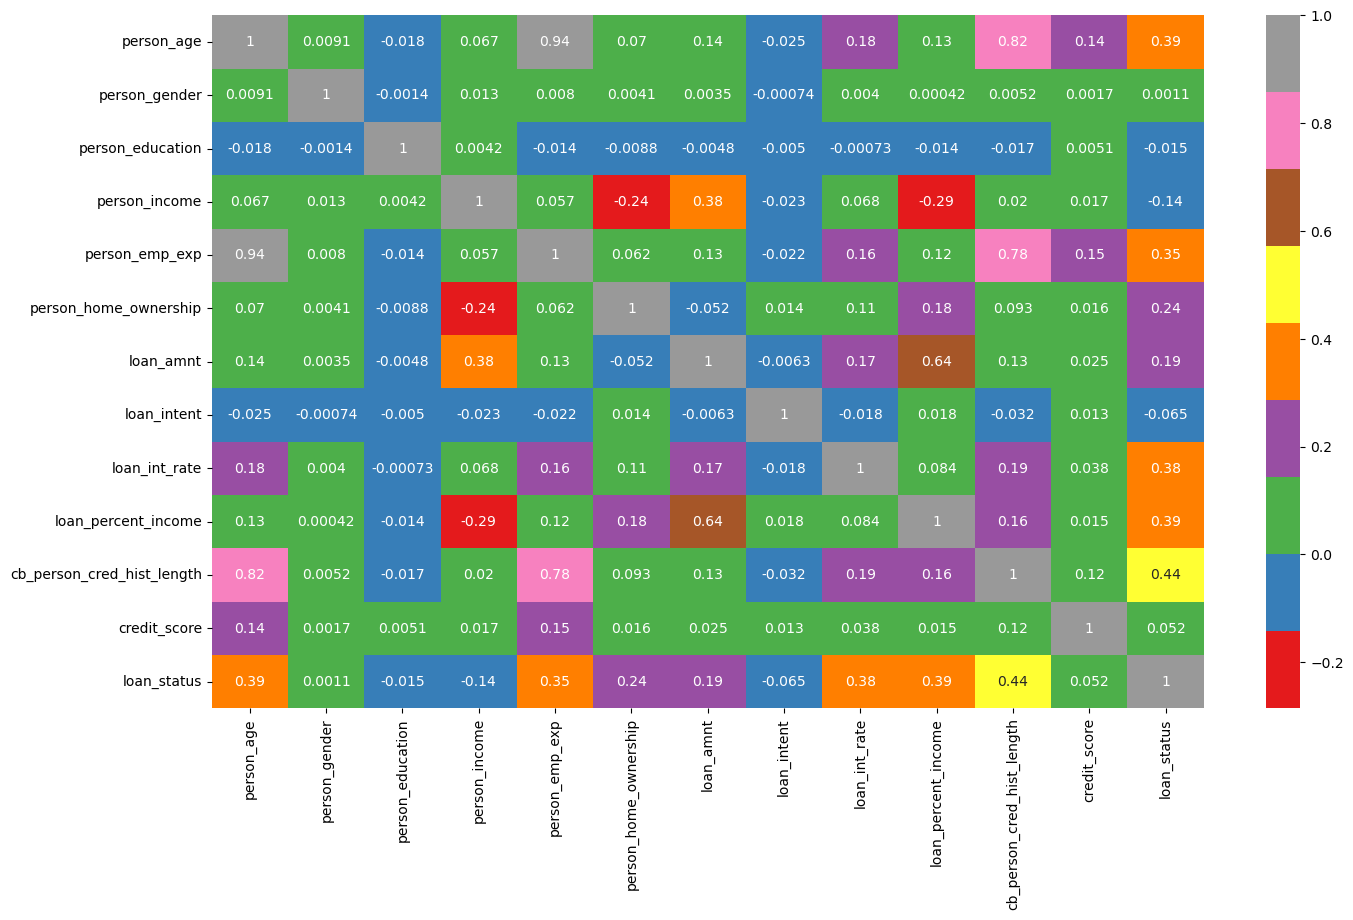

In [50]:
plt.figure(figsize=(16,9))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='Set1')
plt.show()

In [51]:
data = data.drop(['person_gender'], axis=1)

In [52]:
data.columns

Index(['person_age', 'person_education', 'person_income', 'person_emp_exp',
       'person_home_ownership', 'loan_amnt', 'loan_intent', 'loan_int_rate',
       'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score',
       'loan_status'],
      dtype='object')

In [53]:
# training and normalization of data
X = data[['person_age', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score']]
Y = data['loan_status']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state=1)

In [54]:
from sklearn.svm import SVC
svc= SVC()
svc.fit(X_train,Y_train)


SVC()

In [55]:
Y_pred = svc.predict(X_test)
Y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [56]:
pd.DataFrame({'Results':list(Y_pred)})

,Results
0,0
1,0
2,0
3,1
4,1
...,...
4121,0
4122,1
4123,1
4124,0


In [57]:
#test aucc
svc_accuracy= round(accuracy_score(Y_test,Y_pred)*100,2) # Accuracy
svc_accuracy

70.48

In [58]:
#train aucc
Y_train_pred = svc.predict(X_train)
svc_accuracy= round(accuracy_score(Y_train,Y_train_pred), 2)*100 # Accuracy
svc_accuracy

70.0

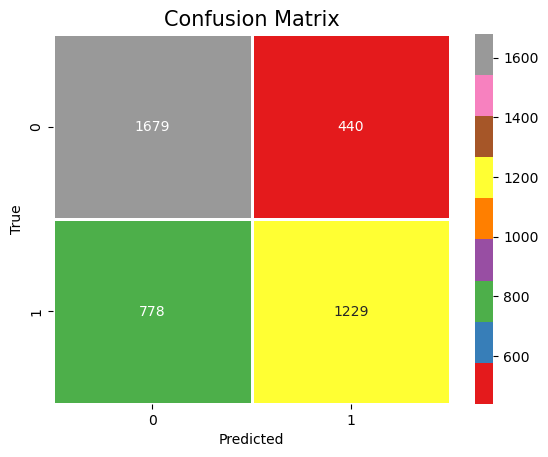

In [59]:
cm=confusion_matrix(Y_test,Y_pred)
#checkout recording of 16th jan
class_label = [0, 1]

df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)

sns.heatmap(df_cm, annot=True, cmap='Set1', linewidths=2, fmt='d')
plt.title("Confusion Matrix",fontsize=15)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()